In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy as sp

In [2]:
chotot = pd.read_csv("./preprocess/chotot.csv")
bonbanh = pd.read_csv("./preprocess/bonbanh.csv")
print(*[i for i in 'Hãng khác'])

H a ̃ n g   k h á c


In [3]:
df = pd.read_csv('./preprocess/mix_data.csv', sep = ",", index_col=0)

# drop NaN
df.dropna(how='any',inplace=True)

# Dòng xe NAN
df = df[df.dong_xe != 'NAN']
df.dong_xe = df.dong_xe.replace(['GrandStarex'], ['Starex'])

# drop duplicate
df.drop_duplicates(inplace=True)

# Kiểu unicode -> đồng bộ utf-8
df.hang = df.hang.replace(["Hãng khác"],["Hãng khác"]) 

# Có 1 bản ghi bị nhiễu hộp số là 5 => search mạng: honda CRV = tự động
df.hop_so = df.hop_so.replace(['5'], ['Tự động'])
df.hop_so = df.hop_so.replace(['Số tay'],['Số sàn'])

# Quy chung về hybrid
df.nhien_lieu = df.nhien_lieu.replace(['Động cơ Hybrid'], ['Hybrid']) 

# Chỉ chọn những xe có giá từ 30 triệu đến 100 tỷ ( Vì ở Việt Nam xe đắt tiền nhất mới lên tới 80 tỷ )
df = df[(df.gia > 3e7) & (df.gia < 1e11)]

# Có khả năng người dùng nhập nhầm năm sản xuất là 2022
df.nam_sx = df.nam_sx.replace(["2022"],["2021"])

# Đưa dạng chữ về số cụ thể
df.nam_sx = df["nam_sx"].replace(["Trước 1990", "trước năm 1980"], ['1990', '1980'])

# Những xe có km đã đi > 0 ====> Đã sử dụng
df.loc[df.km_da_di > 0, 'tinh_trang'] = "Đã sử dụng"

# Xử lý số chỗ ngồi = 0
df = df[df.so_cho_ngoi != '0']

# Đã sử dụng nhưng km đã đi = 0???
fail = df.loc[(df.tinh_trang == "Đã sử dụng") & (df.km_da_di == 0)].nam_sx
year = []
for idx,i in enumerate(list(fail.values)):
        year.append(int(i))
# Trung bình 1 năm đi được 20000 km
tb_km_da_di = [20000*(2022-y) for y in year]
df.loc[fail.index, 'km_da_di'] = tb_km_da_di

df = df[df.km_da_di < 1e9] # Đi kiểu gì hơn 1 tỷ km @@

df = df[(df.dong_xe != 'Dòng khác') & (df.dong_xe != 'Dòng khác') & (df.dong_xe != 'khác') & (df.dong_xe != 'Dongkhac') &\
         (df.hang != "Hãng khác") & 
         (df.kieu_dang != "Kiểu dáng khác") &
         (df.so_cho_ngoi != "Khác")]

df

,kieu_dang,hop_so,km_da_di,nhien_lieu,so_cho_ngoi,tinh_trang,xuat_xu,nam_sx,gia,dong_xe,hang
0,Sedan,Tự động,9000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2019,4480000000,Sclass,Mercedes Benz
1,Sedan,Tự động,20000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2017,1155000000,Cclass,Mercedes Benz
2,SUV / Cross over,Tự động,0,Xăng,5,Mới,Lắp ráp trong nước,2021,579000000,Kona,Hyundai
3,SUV / Cross over,Tự động,0,Xăng,5,Mới,Lắp ráp trong nước,2021,825000000,Tucson,Hyundai
4,Sedan,Tự động,32000,Xăng,4,Đã sử dụng,Nhập khẩu,2017,5750000000,Panamera,Porsche
...,...,...,...,...,...,...,...,...,...,...,...
54990,SUV / Cross over,Số sàn,200000,Xăng,8,Đã sử dụng,Lắp ráp trong nước,2009,280000000,Zinger,Mitsubishi
54992,Sedan,Tự động,38000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2018,563000000,3,Mazda
54993,Hatchback,Tự động,70000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2009,185000000,Morning,Kia
54994,Sedan,Số sàn,2555,Xăng,5,Đã sử dụng,Nhập khẩu,1999,42500000,Matiz,Daewoo


In [4]:
df = df[df.hop_so.isin(df.hop_so.value_counts().index[df.hop_so.value_counts() >= 5]).values]
#df = df[df.so_cho_ngoi.isin(df.so_cho_ngoi.value_counts().index[df.so_cho_ngoi.value_counts() >= 5]).values]
df = df[df.dong_xe.isin(df.dong_xe.value_counts().index[df.dong_xe.value_counts() >= 5]).values]
df = df[df.hang.isin(df.hang.value_counts().index[df.hang.value_counts() >= 5]).values]
df

,kieu_dang,hop_so,km_da_di,nhien_lieu,so_cho_ngoi,tinh_trang,xuat_xu,nam_sx,gia,dong_xe,hang
0,Sedan,Tự động,9000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2019,4480000000,Sclass,Mercedes Benz
1,Sedan,Tự động,20000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2017,1155000000,Cclass,Mercedes Benz
2,SUV / Cross over,Tự động,0,Xăng,5,Mới,Lắp ráp trong nước,2021,579000000,Kona,Hyundai
3,SUV / Cross over,Tự động,0,Xăng,5,Mới,Lắp ráp trong nước,2021,825000000,Tucson,Hyundai
4,Sedan,Tự động,32000,Xăng,4,Đã sử dụng,Nhập khẩu,2017,5750000000,Panamera,Porsche
...,...,...,...,...,...,...,...,...,...,...,...
54990,SUV / Cross over,Số sàn,200000,Xăng,8,Đã sử dụng,Lắp ráp trong nước,2009,280000000,Zinger,Mitsubishi
54992,Sedan,Tự động,38000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2018,563000000,3,Mazda
54993,Hatchback,Tự động,70000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2009,185000000,Morning,Kia
54994,Sedan,Số sàn,2555,Xăng,5,Đã sử dụng,Nhập khẩu,1999,42500000,Matiz,Daewoo


In [5]:
#print(df.kieu_dang.value_counts())
print(df.hop_so.value_counts())
# cút print(df.nhien_lieu.value_counts())
# Cân nhắc : print(df.so_cho_ngoi.value_counts())
# cút print(df.tinh_trang.value_counts())
# cút print(df.xuat_xu.value_counts())
# Cân nhắc : print(df.dong_xe.value_counts())
#print(df.hang.value_counts())

Tự động        26553
Số sàn         14443
Bán tự động      152
Name: hop_so, dtype: int64


In [6]:
dong = df.hang.value_counts()
for idx, value in enumerate(dong.items()):
    print(value)

('Toyota', 9564)
('Hyundai', 5122)
('Kia', 4851)
('Ford', 3914)
('Mercedes Benz', 3351)
('Mazda', 2795)
('Honda', 1800)
('Mitsubishi', 1777)
('Chevrolet', 1600)
('Daewoo', 1134)
('Lexus', 761)
('BMW', 735)
('Suzuki', 580)
('Nissan', 560)
('LandRover', 402)
('VinFast', 349)
('Audi', 293)
('Porsche', 254)
('Isuzu', 222)
('Thaco', 219)
('Peugeot', 140)
('Volkswagen', 91)
('Bentley', 63)
('MG', 55)
('Ssangyong', 54)
('Fiat', 51)
('Mini', 45)
('Volvo', 40)
('Daihatsu', 33)
('Jaguar', 32)
('Cadillac', 30)
('Rolls Royce', 30)
('Jeep', 29)
('Subaru', 29)
('Maserati', 26)
('Dongben', 23)
('Infiniti', 15)
('Acura', 13)
('Lincoln', 13)
('Chery', 11)
('Chrysler', 10)
('Ferrari', 6)
('Dodge', 6)
('UAZ', 5)
('Lifan', 5)
('Samsung', 5)
('Zotye', 5)


In [7]:
df.reset_index(col_level = 0, inplace=True,drop=True)
df

,kieu_dang,hop_so,km_da_di,nhien_lieu,so_cho_ngoi,tinh_trang,xuat_xu,nam_sx,gia,dong_xe,hang
0,Sedan,Tự động,9000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2019,4480000000,Sclass,Mercedes Benz
1,Sedan,Tự động,20000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2017,1155000000,Cclass,Mercedes Benz
2,SUV / Cross over,Tự động,0,Xăng,5,Mới,Lắp ráp trong nước,2021,579000000,Kona,Hyundai
3,SUV / Cross over,Tự động,0,Xăng,5,Mới,Lắp ráp trong nước,2021,825000000,Tucson,Hyundai
4,Sedan,Tự động,32000,Xăng,4,Đã sử dụng,Nhập khẩu,2017,5750000000,Panamera,Porsche
...,...,...,...,...,...,...,...,...,...,...,...
41143,SUV / Cross over,Số sàn,200000,Xăng,8,Đã sử dụng,Lắp ráp trong nước,2009,280000000,Zinger,Mitsubishi
41144,Sedan,Tự động,38000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2018,563000000,3,Mazda
41145,Hatchback,Tự động,70000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2009,185000000,Morning,Kia
41146,Sedan,Số sàn,2555,Xăng,5,Đã sử dụng,Nhập khẩu,1999,42500000,Matiz,Daewoo


In [8]:
print(df.shape) # 54978 cột, 11 hàng
df.dtypes
min(sorted(df.gia.unique()))

(41148, 11)


32000000

### Hãng xe

In [9]:
print(df.hang.describe())
'''
    Có tổng 65 hãng xe
    Trong đó phổ biến nhất Toyota với tần xuất 11860
'''

count      41148
unique        47
top       Toyota
freq        9564
Name: hang, dtype: object


'\n    Có tổng 65 hãng xe\n    Trong đó phổ biến nhất Toyota với tần xuất 11860\n'

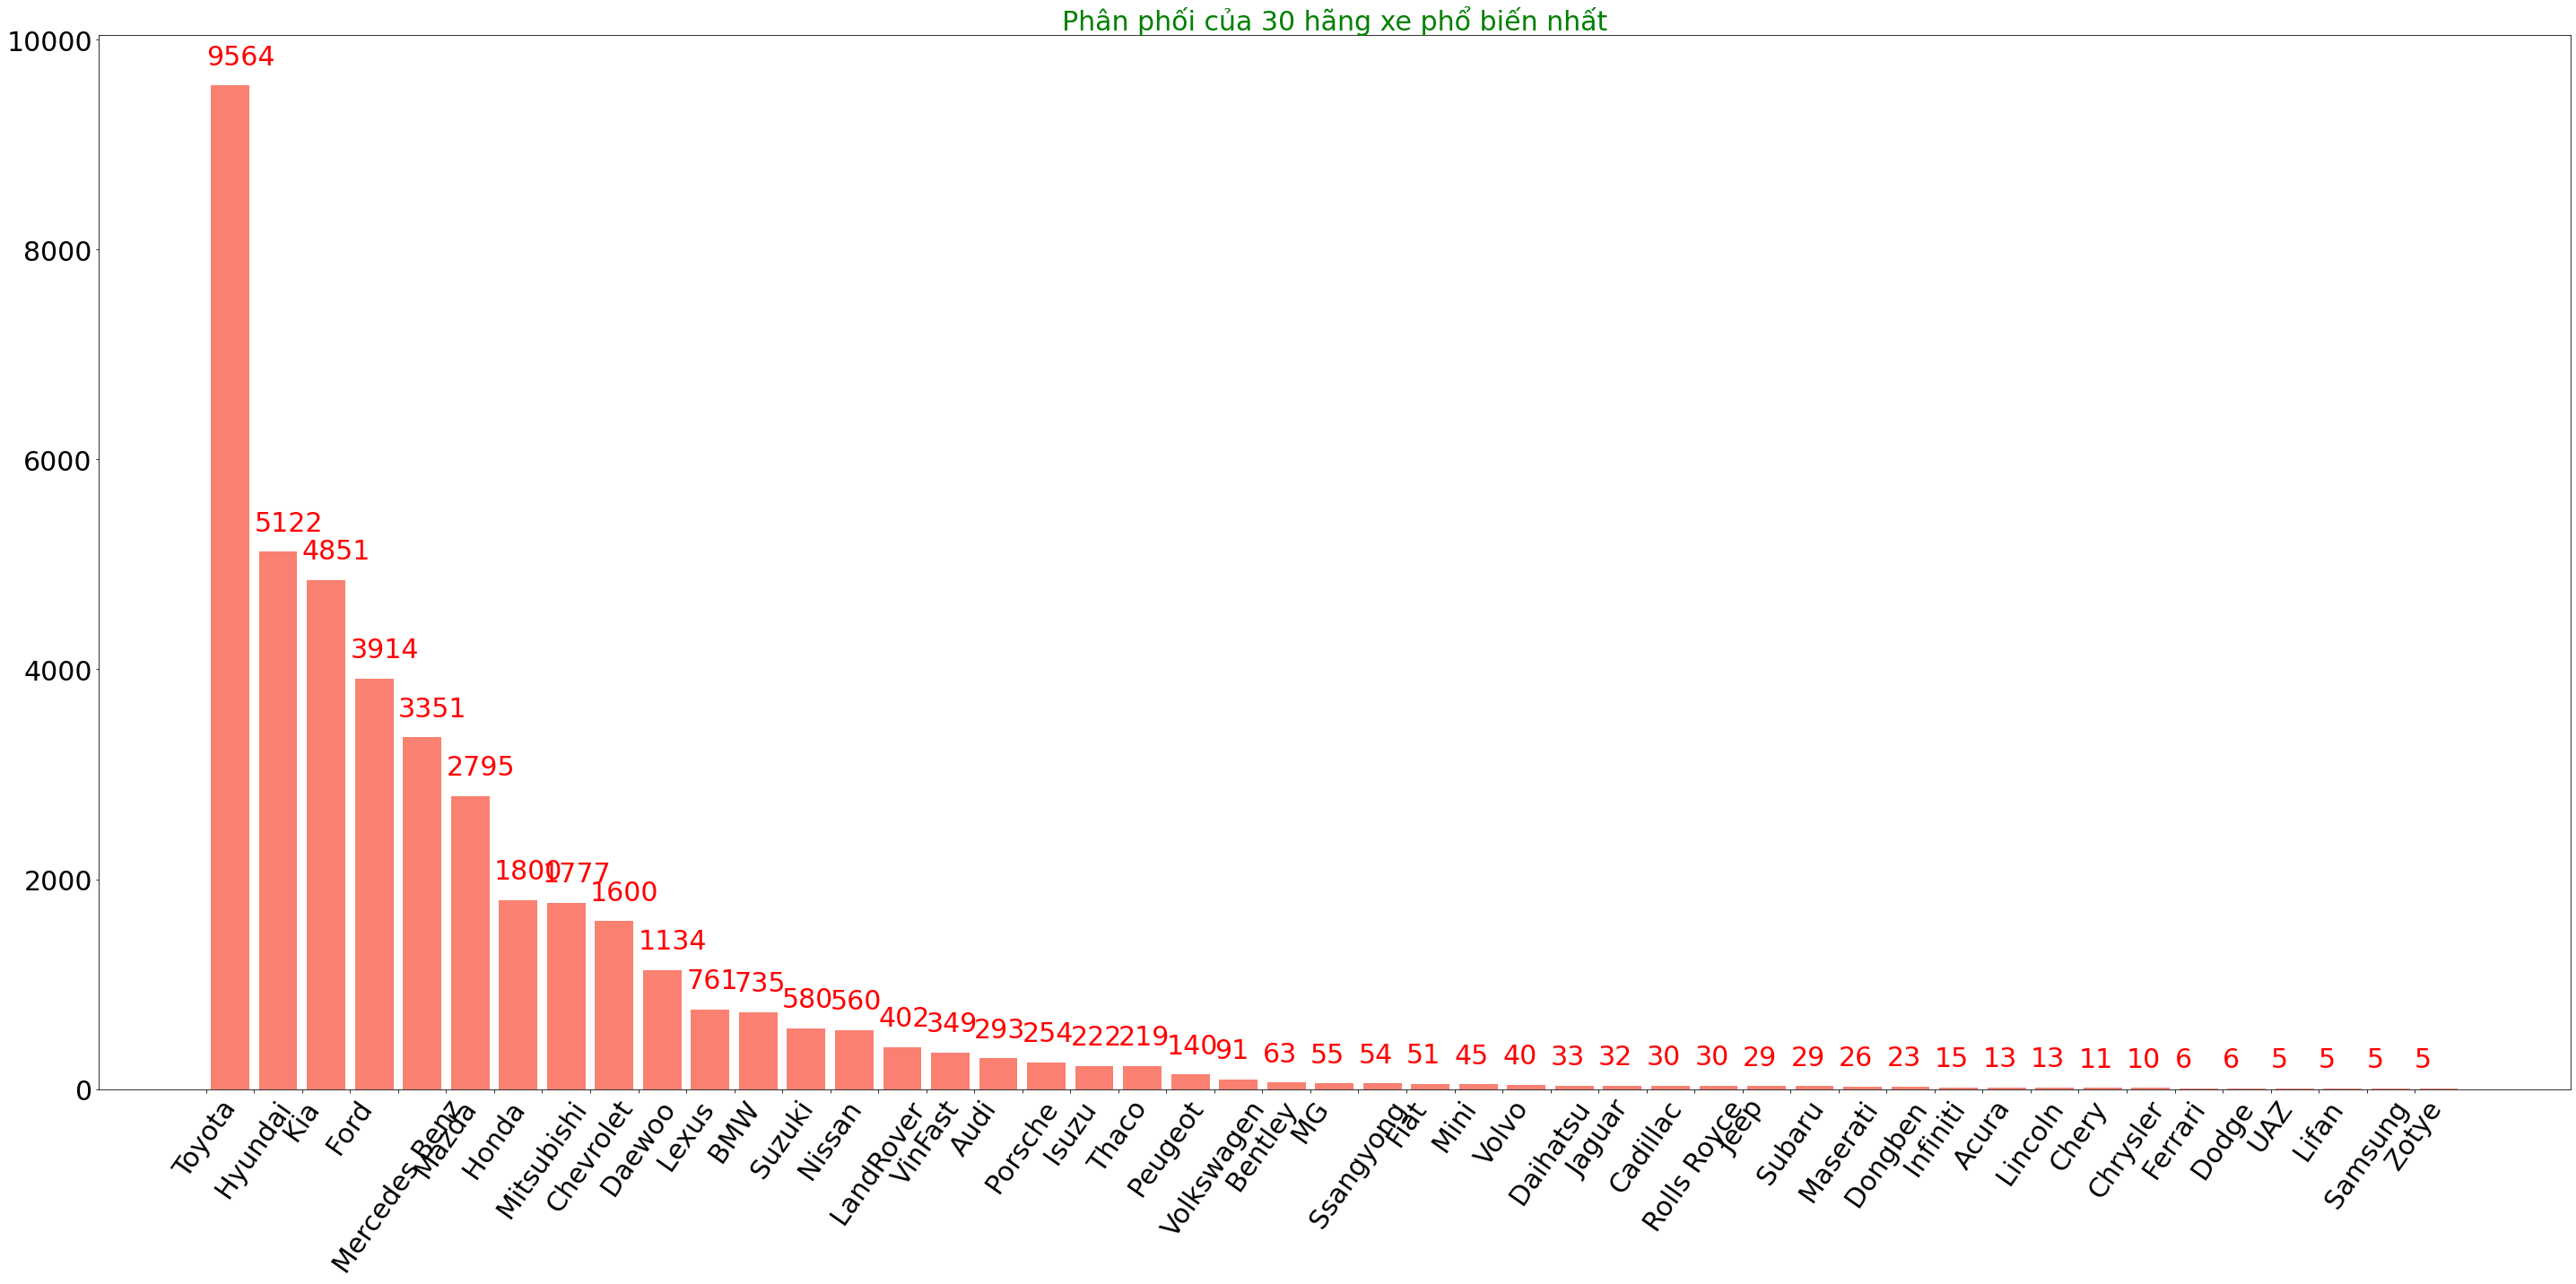

In [10]:
fig, ax = plt.subplots(figsize = (40,20))
x = []
y = []
for idx, value in enumerate(df['hang'].value_counts()[:].items()):
    x.append(value[0])
    y.append(value[1])
    ax.text(x = idx-0.5, y = (value[1] + 200), s = str(value[1]), color = 'red', fontdict=dict(fontsize=30))
    #print(value[1])
ax.bar(x,y, color = "salmon", width = 0.8)
#plt.sca(ax1)
plt.xticks([i-0.5 for i in range(len(x))],x, rotation = 55,fontsize = 30)
plt.yticks(fontsize = 30)
plt.title(label="Phân phối của 30 hãng xe phổ biến nhất", fontdict=dict(fontsize = 30, color = "green"))
plt.tight_layout()
plt.show()

In [11]:
df[ ( df.hang.isin(list(df.hang.value_counts().sort_values(ascending = False)[:40].index.get_level_values(0))) ) ]

,kieu_dang,hop_so,km_da_di,nhien_lieu,so_cho_ngoi,tinh_trang,xuat_xu,nam_sx,gia,dong_xe,hang
0,Sedan,Tự động,9000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2019,4480000000,Sclass,Mercedes Benz
1,Sedan,Tự động,20000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2017,1155000000,Cclass,Mercedes Benz
2,SUV / Cross over,Tự động,0,Xăng,5,Mới,Lắp ráp trong nước,2021,579000000,Kona,Hyundai
3,SUV / Cross over,Tự động,0,Xăng,5,Mới,Lắp ráp trong nước,2021,825000000,Tucson,Hyundai
4,Sedan,Tự động,32000,Xăng,4,Đã sử dụng,Nhập khẩu,2017,5750000000,Panamera,Porsche
...,...,...,...,...,...,...,...,...,...,...,...
41143,SUV / Cross over,Số sàn,200000,Xăng,8,Đã sử dụng,Lắp ráp trong nước,2009,280000000,Zinger,Mitsubishi
41144,Sedan,Tự động,38000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2018,563000000,3,Mazda
41145,Hatchback,Tự động,70000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2009,185000000,Morning,Kia
41146,Sedan,Số sàn,2555,Xăng,5,Đã sử dụng,Nhập khẩu,1999,42500000,Matiz,Daewoo


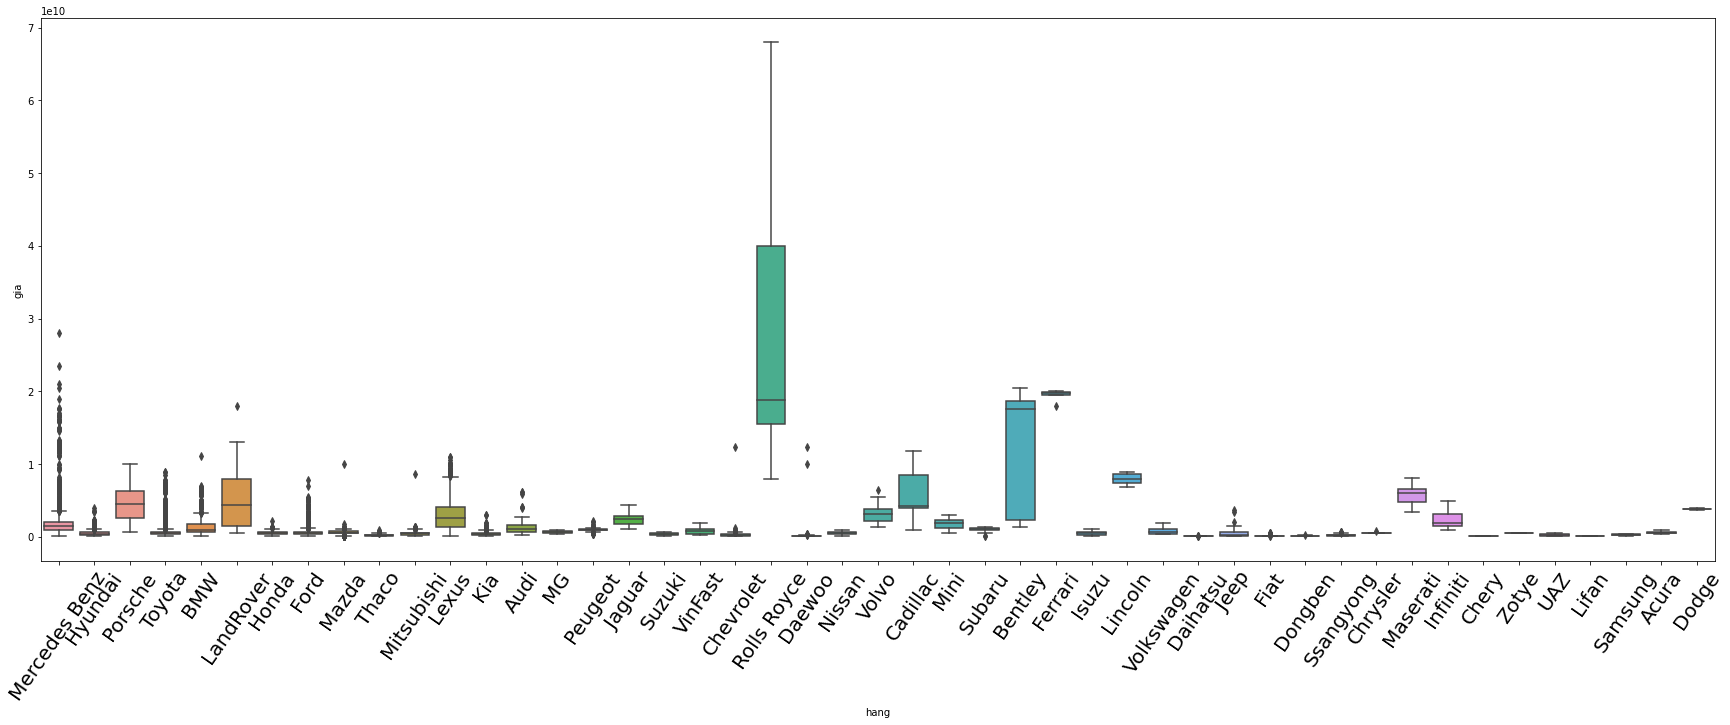

In [12]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(ax =ax, x = "hang", y = "gia", data = df[ ( df.hang.isin(list(df.hang.value_counts().sort_values(ascending = False)[:].index.get_level_values(0))) ) & ( df.gia < 1e11 )])
plt.xticks(fontsize =20, rotation = 55)
plt.show()

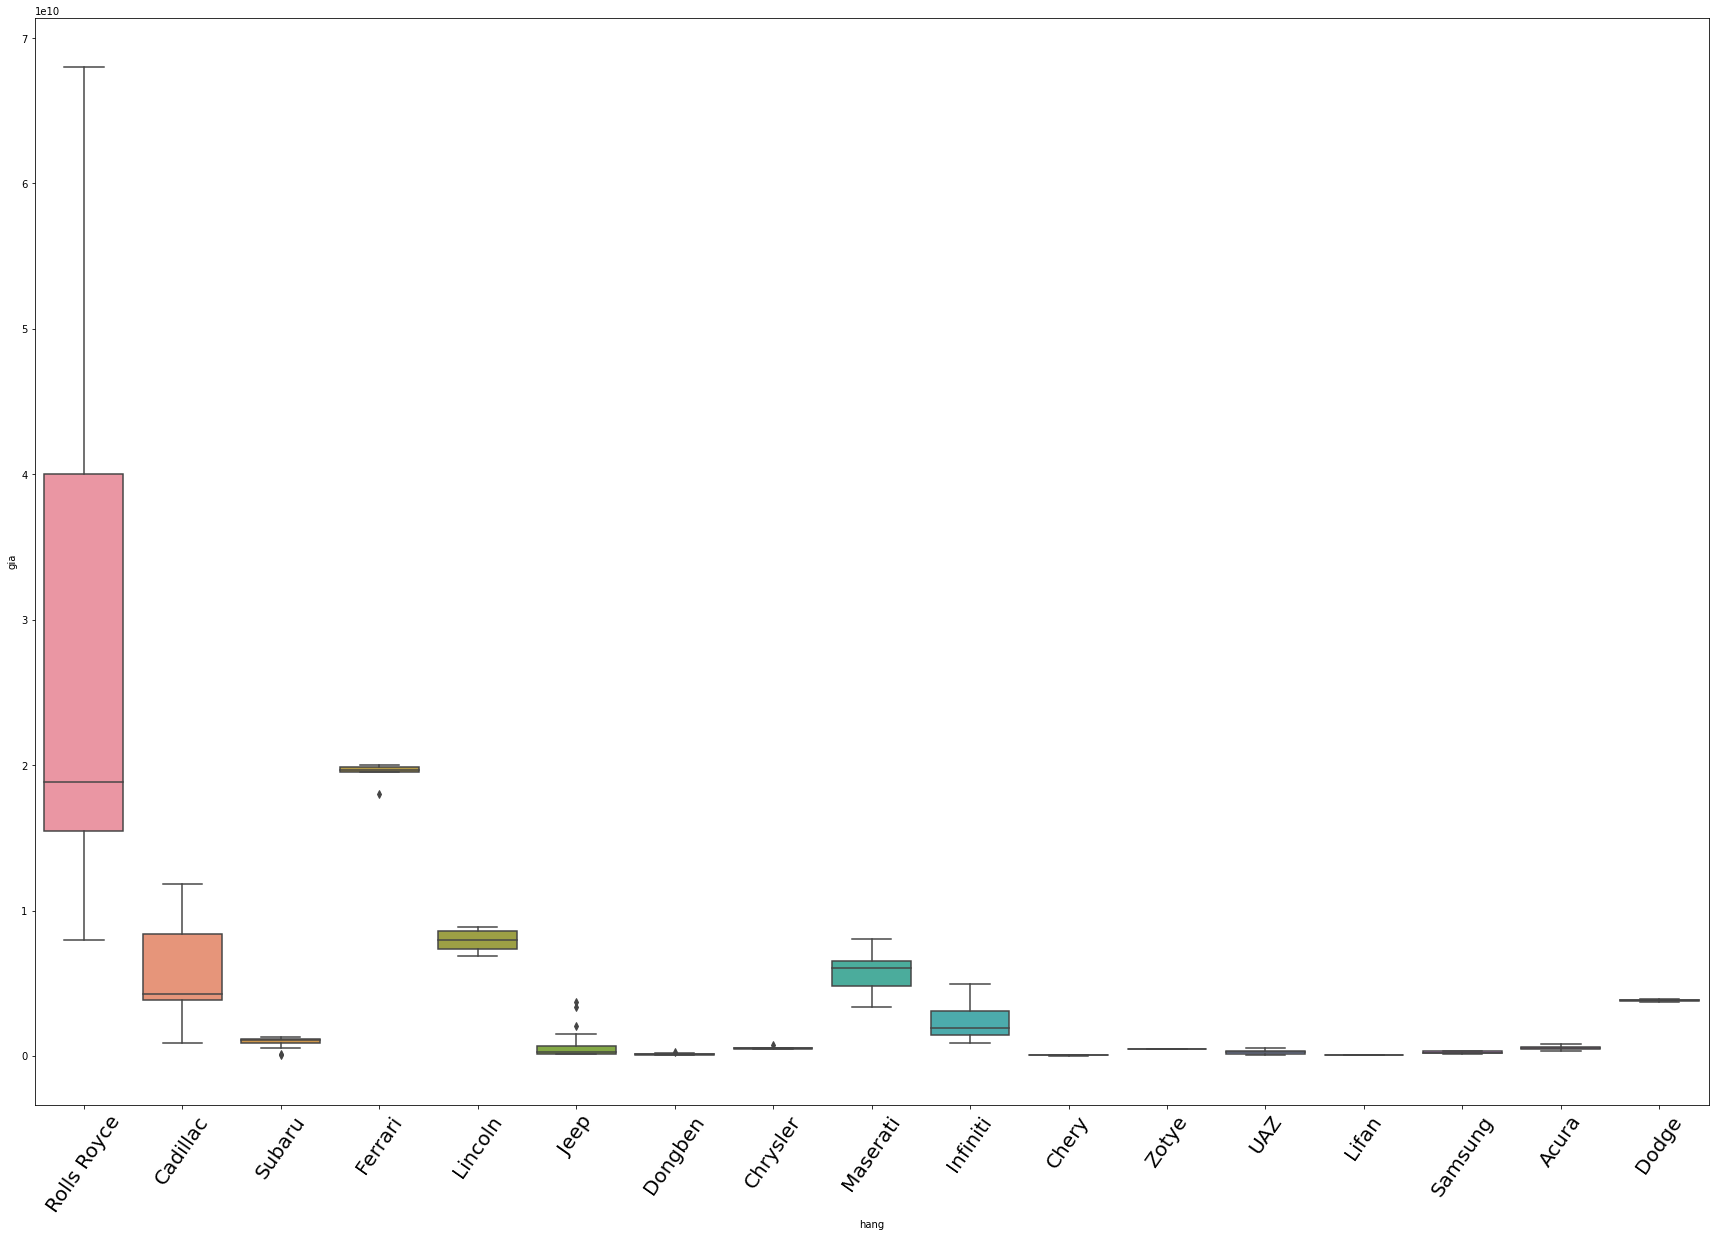

In [13]:
fig, ax = plt.subplots(figsize=(30,20))
sns.boxplot(ax =ax, x = "hang", y = "gia", data = df[ ( df.hang.isin(list(df.hang.value_counts().sort_values(ascending = False)[30:].index.get_level_values(0))) ) & ( df.gia < 1e11 )])
plt.xticks(fontsize =20, rotation = 55)
plt.show()

### Kiểu dáng

##### Phân phối của kiểu dáng

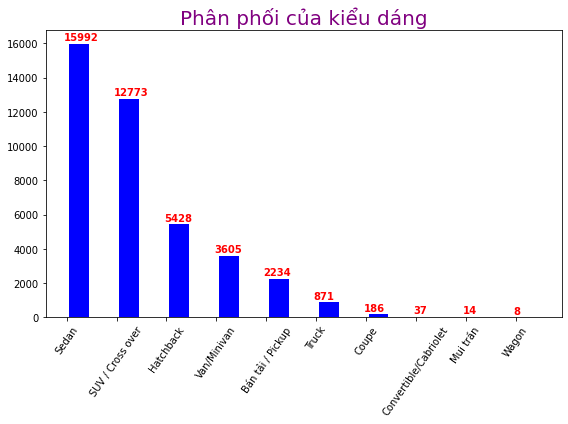

In [14]:
fig, ax = plt.subplots(figsize = (8,6))
x = []
y = []
for idx, value in enumerate(df['kieu_dang'].value_counts().items()):
    x.append(value[0])
    y.append(value[1])
    ax.text(x = idx-0.3, y = (value[1] + 200), s = str(value[1]), fontweight = "bold", color = 'red', fontdict=dict(fontsize=10))
    #print(value[1])
ax.bar(x,y, color = "blue", width = 0.4)
#plt.sca(ax1)
plt.xticks([i-0.25 for i in range(len(x))],x, rotation = 55,fontsize = 10)
plt.yticks(fontsize = 10)
plt.title(label="Phân phối của kiểu dáng", fontdict=dict(fontsize = 20, color = "purple"))
plt.tight_layout()
plt.show()

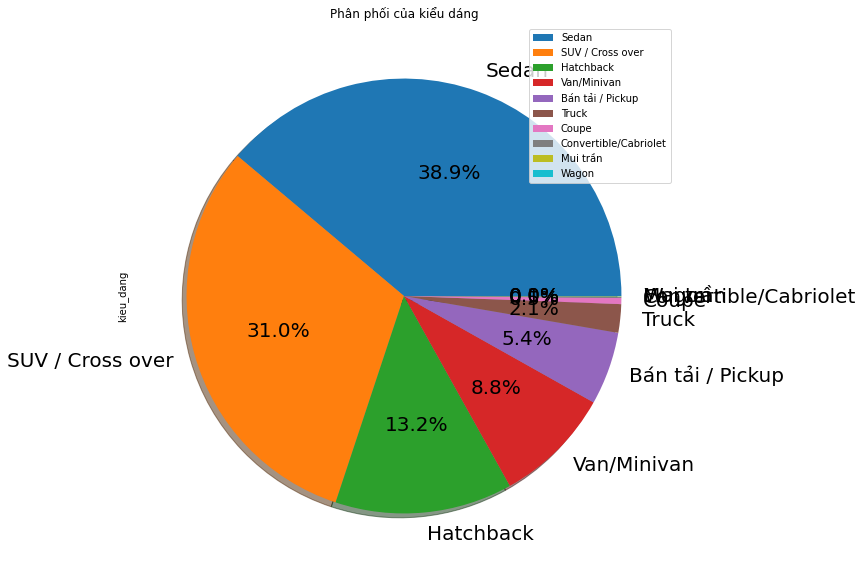

In [15]:
df['kieu_dang'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%', shadow = True, legend = True, figsize = (20,10), fontsize = 20)
#plt.legend(loc="upper right")
plt.title('Phân phối của kiểu dáng')
plt.show()

#### Kiểu dáng - số chỗ ngồi

In [16]:
dang_cho = df[["so_cho_ngoi","kieu_dang"]].value_counts()
so_cho_ngoi = dang_cho.index.get_level_values(0)
kieu_dang = dang_cho.index.get_level_values(1)
values = dang_cho.values

dang_cho = pd.DataFrame(columns=["Số chỗ ngồi", "Kiểu dáng", "Giá trị"])
dang_cho["Số chỗ ngồi"] = so_cho_ngoi
dang_cho["Kiểu dáng"] = kieu_dang
dang_cho["Giá trị"] = values

import plotly.express as px
px.bar(data_frame = dang_cho, x = "Kiểu dáng", y = "Giá trị", color = "Số chỗ ngồi")

##### Hãng xe - Kiểu dáng

In [17]:
hd = df[["hang","kieu_dang"]].value_counts()
hang = hd.index.get_level_values(0)
kieu_dang = hd.index.get_level_values(1)
values = hd.values

hd = pd.DataFrame(columns=["Hãng xe", "Kiểu dáng", "Giá trị"])
hd["Hãng xe"] = hang
hd["Kiểu dáng"] = kieu_dang
hd["Giá trị"] = values

import plotly.express as px
px.bar(data_frame = hd, x = "Hãng xe", y = "Giá trị", color = "Kiểu dáng")

In [18]:
index = list(df.hang.value_counts()[:20].index.get_level_values(0))
cols = list(hd['Kiểu dáng'].unique())
data = np.full((len(index) , len(cols)) ,0)
#hd[(hd["Hãng xe"] == "Toyota") & (hd['Kiểu dáng'] == "Sedan")]
for num_idx, idx in enumerate(index):
    for num_col, col in enumerate(cols):
        if len(list(hd[(hd["Hãng xe"] == idx) & (hd['Kiểu dáng'] == col)]['Giá trị'])) > 0:
            data[num_idx][num_col] = list(hd[(hd["Hãng xe"] == idx) & (hd['Kiểu dáng'] == col)]['Giá trị'])[0]
    
hd_heatmap = pd.DataFrame(columns=cols, index=index,data= data)
'''
hd_heatmap_2 = hd.pivot("Hãng xe","Kiểu dáng","Giá trị").fillna(0)
sns.heatmap(hd_heatmap_2)
'''

'\nhd_heatmap_2 = hd.pivot("Hãng xe","Kiểu dáng","Giá trị").fillna(0)\nsns.heatmap(hd_heatmap_2)\n'

<AxesSubplot:>

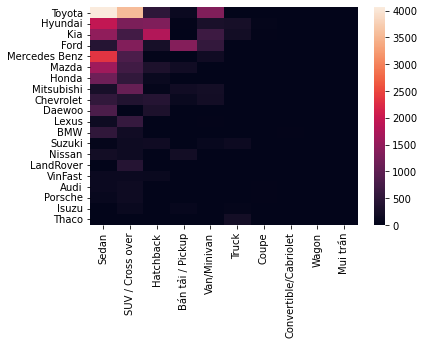

In [19]:
sns.heatmap(hd_heatmap)

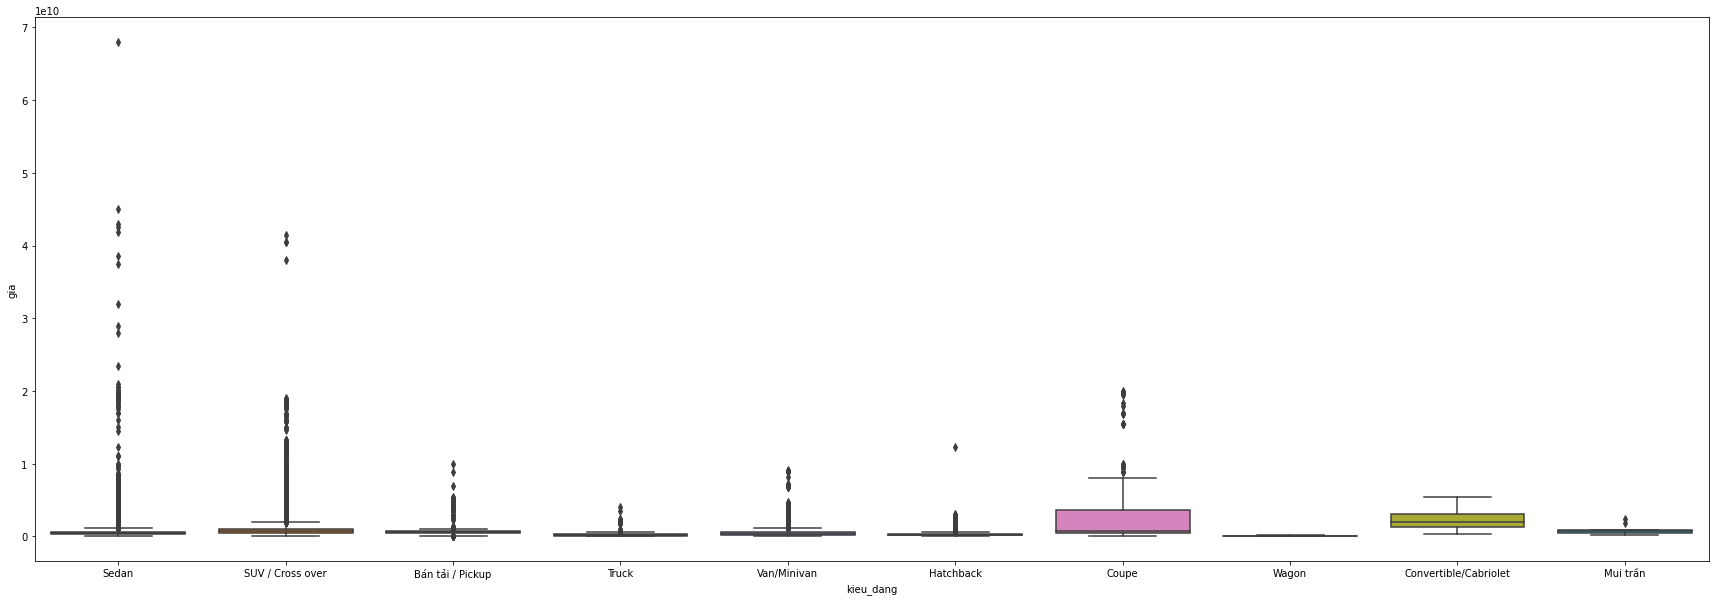

In [20]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(ax =ax, x = "kieu_dang", y = "gia", data = df)
plt.show()

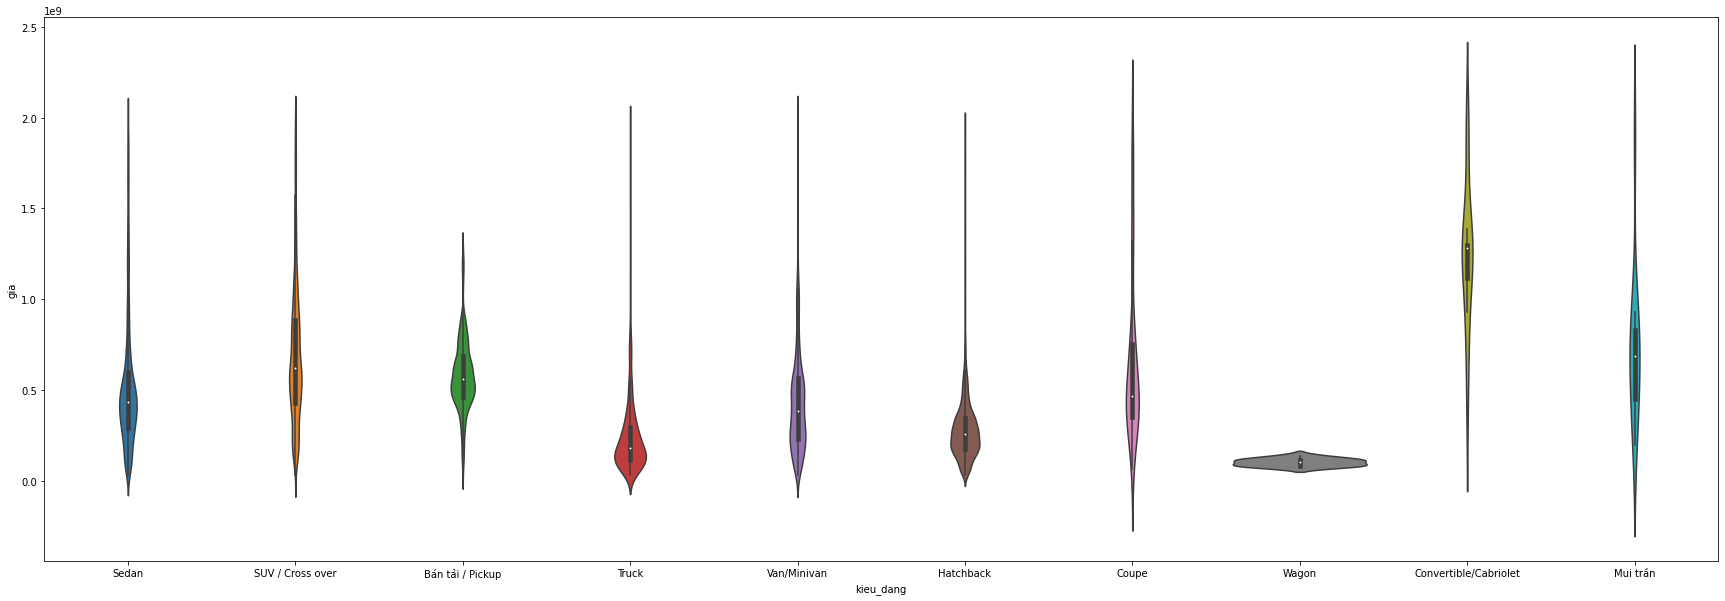

In [21]:
fig, ax = plt.subplots(figsize=(30,10))
sns.violinplot(ax =ax, x = "kieu_dang", y = "gia", data = df[df.gia < 2e9])
plt.show()

### Dòng xe

In [22]:
df.dong_xe.describe()

count      41148
unique       319
top       Innova
freq        2393
Name: dong_xe, dtype: object

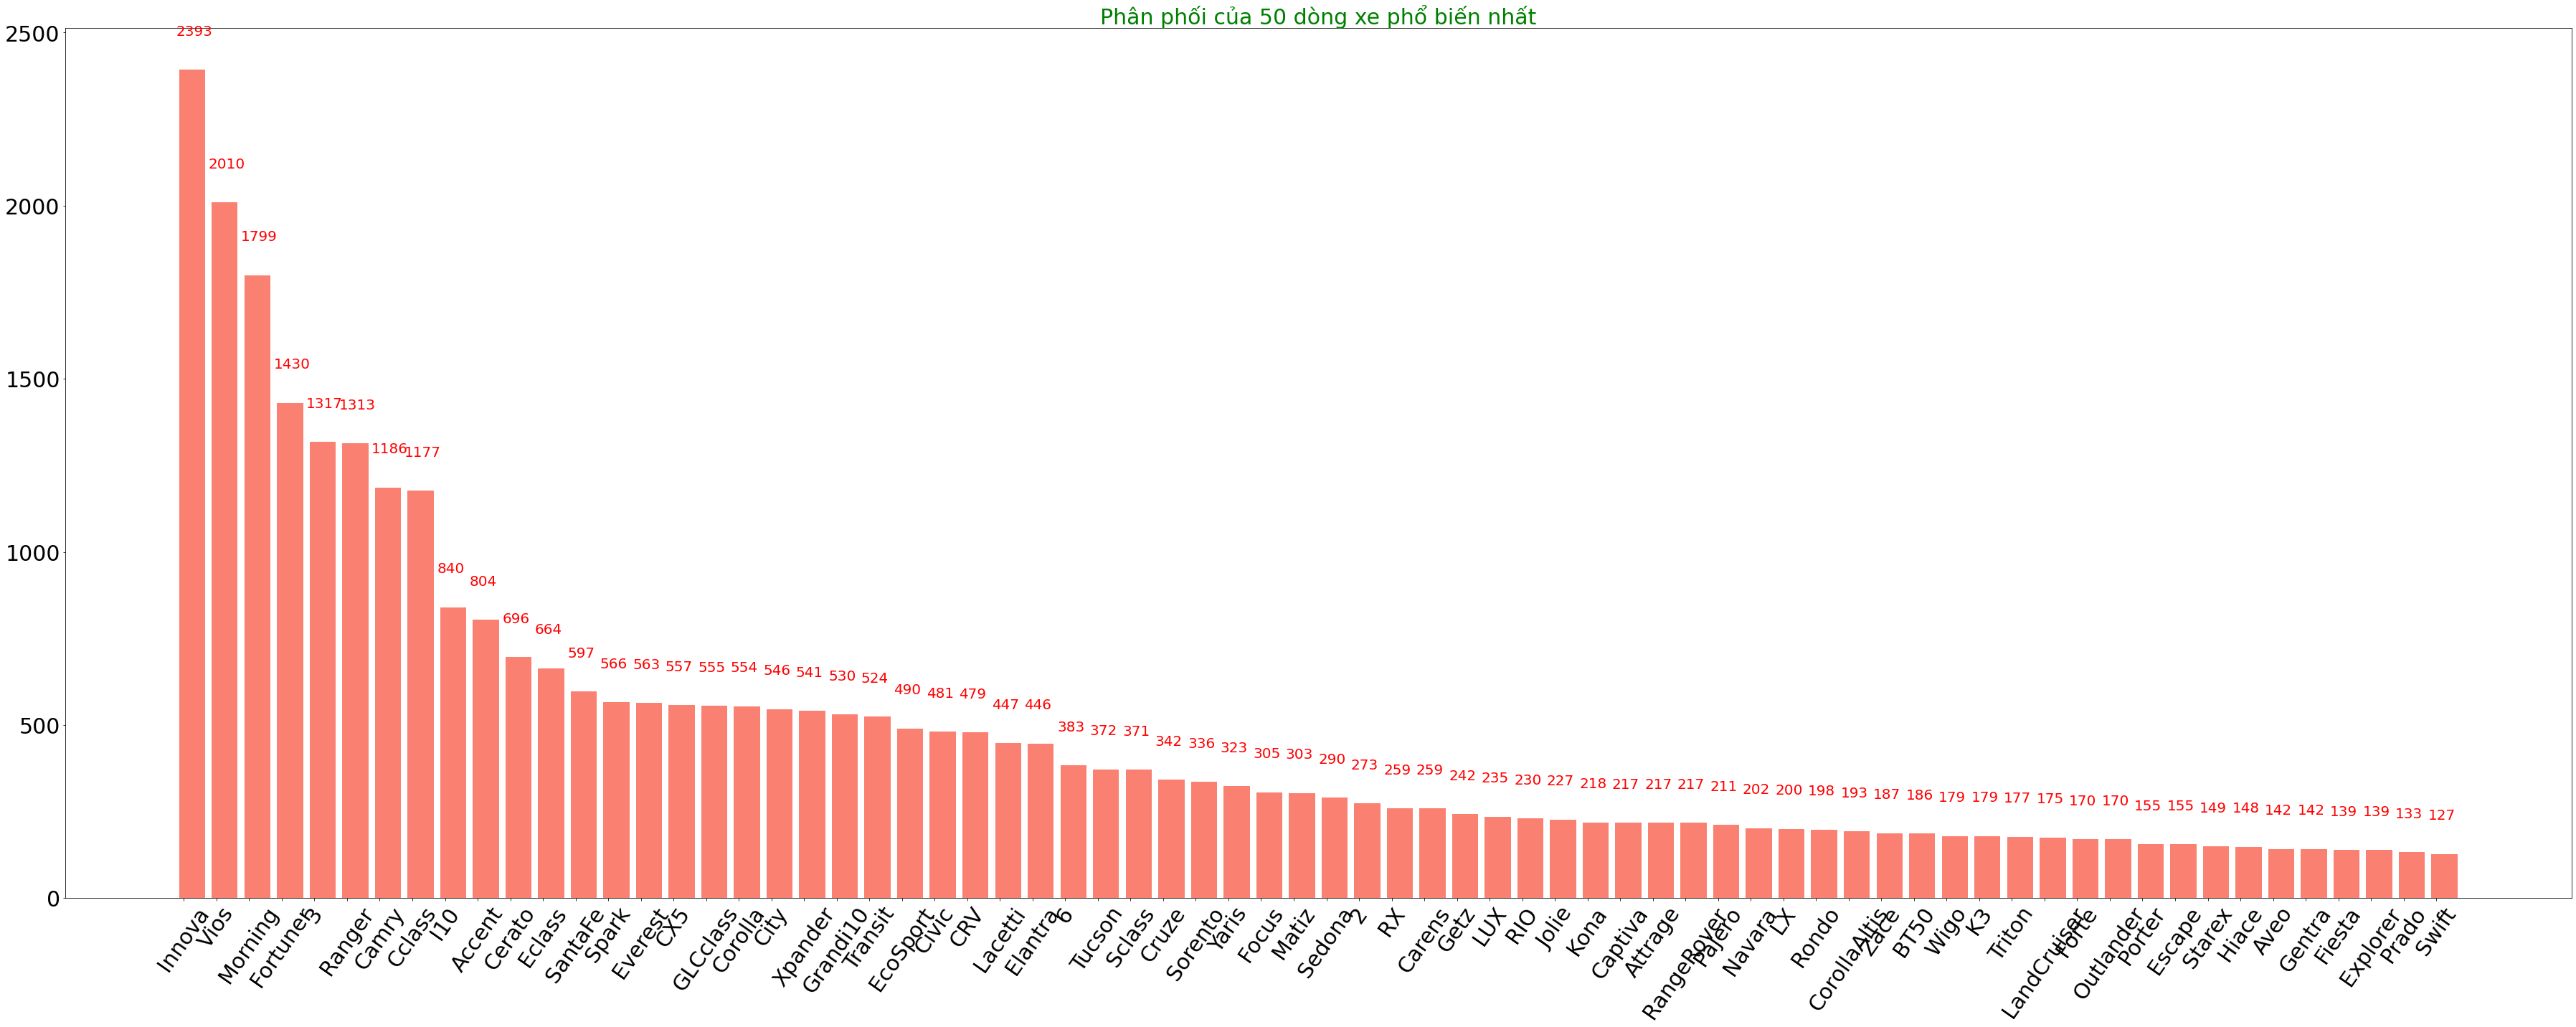

In [23]:
fig, ax = plt.subplots(figsize = (50,20))
x = []
y = []
for idx, value in enumerate(df['dong_xe'].value_counts()[:70].items()):
    x.append(value[0])
    y.append(value[1])
    ax.text(x = idx-0.5, y = (value[1] + 100), s = str(value[1]), color = 'red', fontdict=dict(fontsize=20))
    #print(value[1])
ax.bar(x,y, color = "salmon", width = 0.8)
#plt.sca(ax1)
plt.xticks([i-0.25 for i in range(len(x))],x, rotation = 55,fontsize = 30)
plt.yticks(fontsize = 30)
plt.title(label="Phân phối của 50 dòng xe phổ biến nhất", fontdict=dict(fontsize = 30, color = "green"))
plt.tight_layout()
plt.show()

In [24]:
hd = df[["hang","dong_xe"]].value_counts()
hang = hd.index.get_level_values(0)
dong_xe = hd.index.get_level_values(1)
values = hd.values

hd = pd.DataFrame(columns=["Hãng xe", "Dòng xe", "Giá trị"])
hd["Hãng xe"] = hang
hd["Dòng xe"] = dong_xe
hd["Giá trị"] = values

import plotly
import plotly.express as px
px.bar(data_frame = hd, x = "Hãng xe", y = "Giá trị", color = "Dòng xe")

In [25]:
hd = df[["dong_xe", "kieu_dang"]].value_counts()
dong_xe = hd.index.get_level_values(0)
kieu_dang = hd.index.get_level_values(1)
values = hd.values

hd = pd.DataFrame(columns=["Dòng xe", "Kiểu dáng", "Giá trị"])
hd["Dòng xe"] = dong_xe
hd["Kiểu dáng"] = kieu_dang
hd["Giá trị"] = values

import plotly
import plotly.express as px
px.bar(data_frame = hd, x = "Kiểu dáng", y = "Giá trị", color = "Dòng xe")

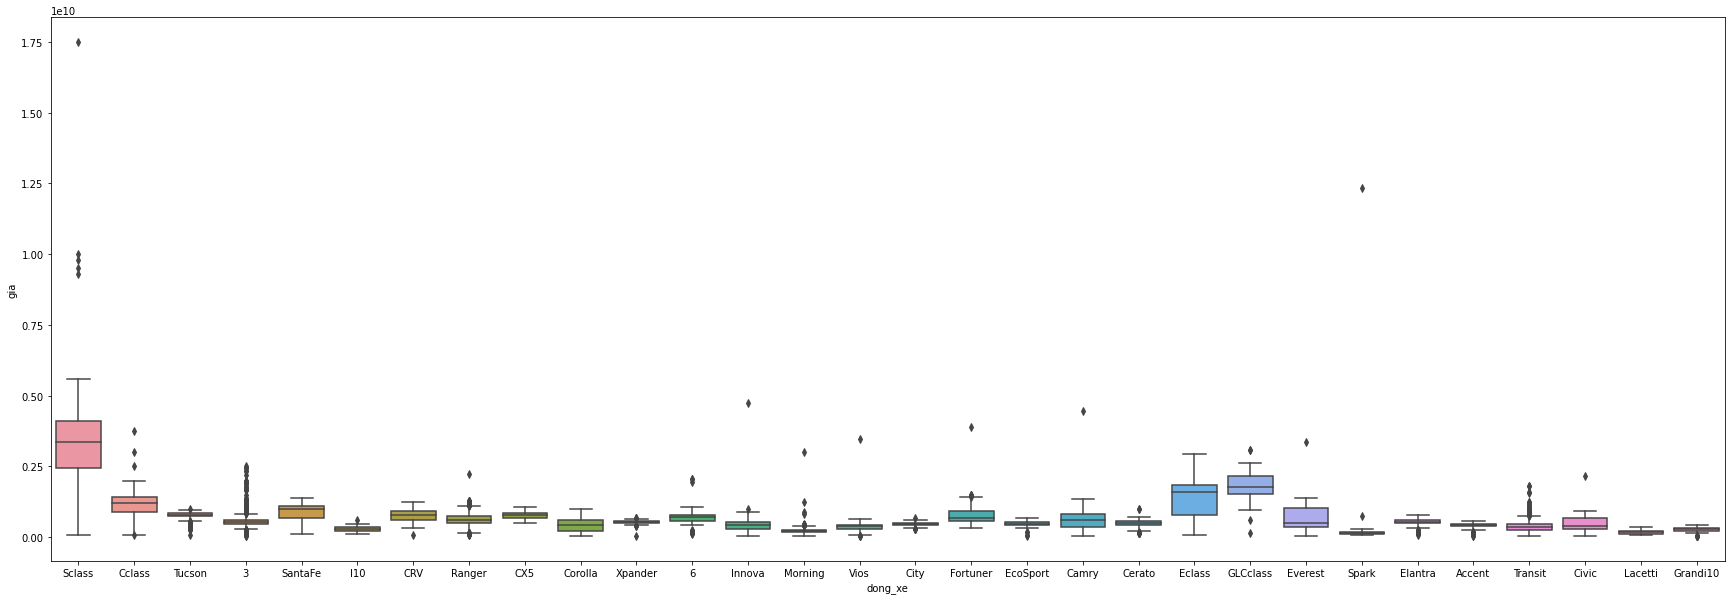

In [26]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(ax =ax, x = "dong_xe", y = "gia", data = df[ ( df.dong_xe.isin(list(df.dong_xe.value_counts().sort_values(ascending = False)[:30].index.get_level_values(0))) ) & ( df.gia < 1e11 )])
plt.show()

### Năm sản xuất

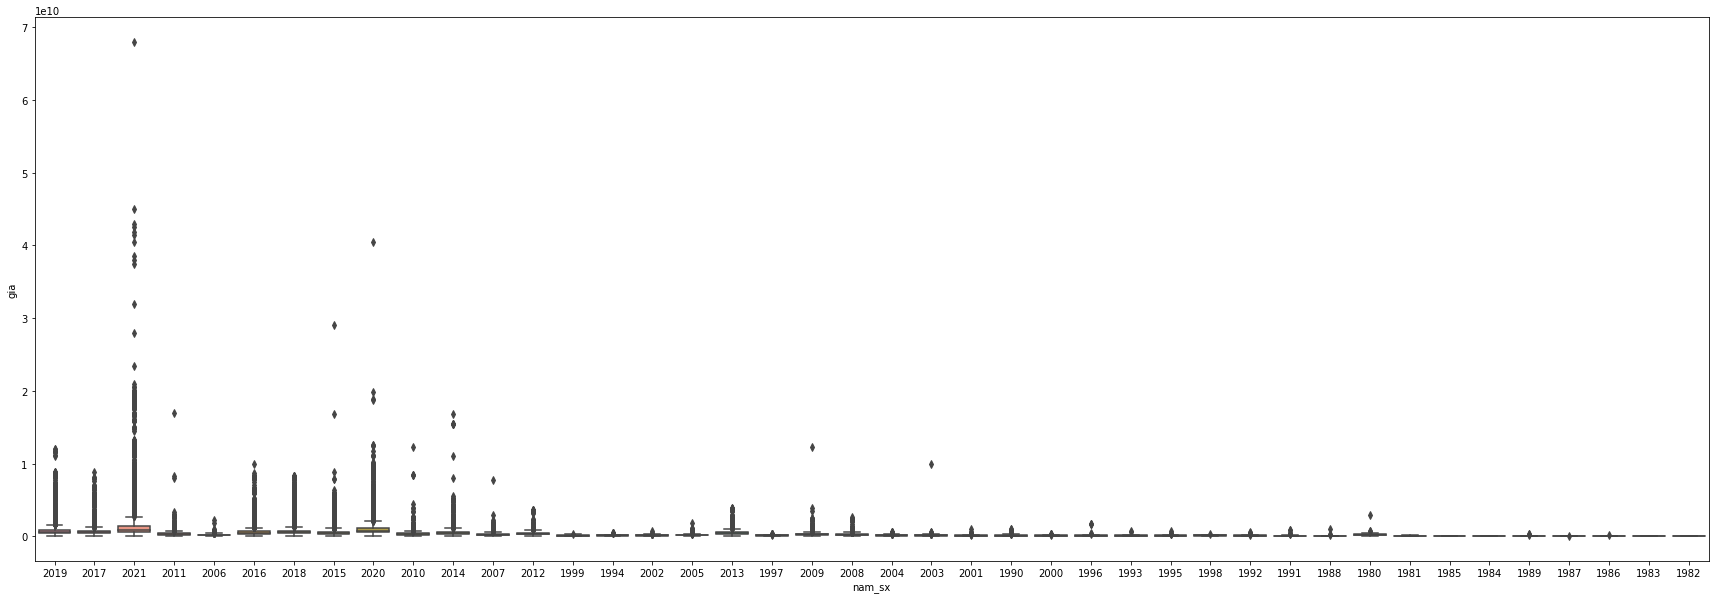

In [27]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(ax =ax, x = "nam_sx", y = "gia", data = df)
plt.show()

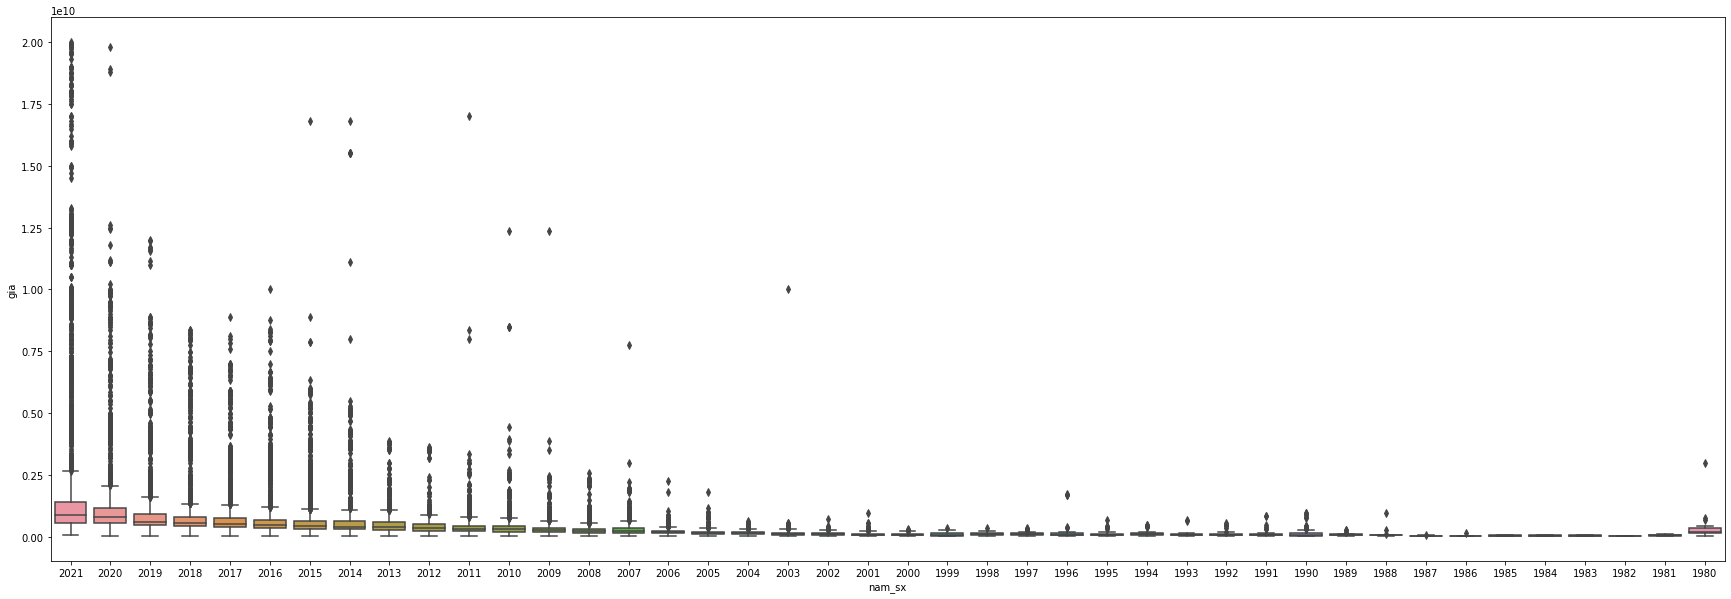

In [28]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(ax =ax, x = "nam_sx", y = "gia", data = df[df.gia < 2e10].sort_values(by = "nam_sx", ascending = False))
#plt.xticks([i-0.25 for i in range(len(x))],x, rotation = 55,fontsize = 30)
plt.show()

In [29]:
df.nam_sx.unique()
df.nam_sx = df["nam_sx"].replace(["Trước 1990", "trước năm 1980"], ['1990', '1980'])
df.nam_sx = pd.to_numeric(df.nam_sx)

### Tình trạng

Đã sử dụng    38270
Mới            2878
Name: tinh_trang, dtype: int64


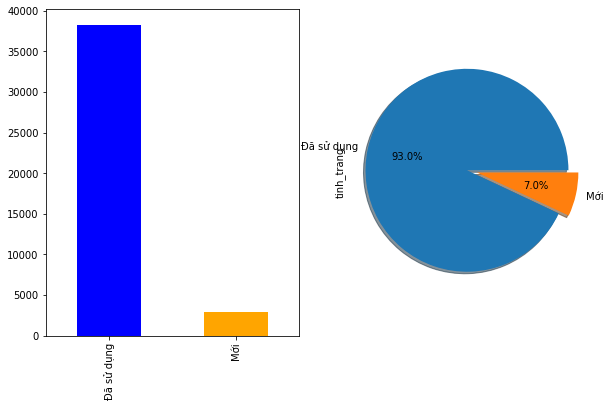

In [30]:
print(df.tinh_trang.value_counts())
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize = (10,6))
df.tinh_trang.value_counts().plot(kind = "bar", ax = ax1, color = ["blue", "orange"])
df.tinh_trang.value_counts().plot(kind = "pie", ax = ax2, shadow = True, autopct='%1.1f%%', explode = (0.1,0))
plt.show()

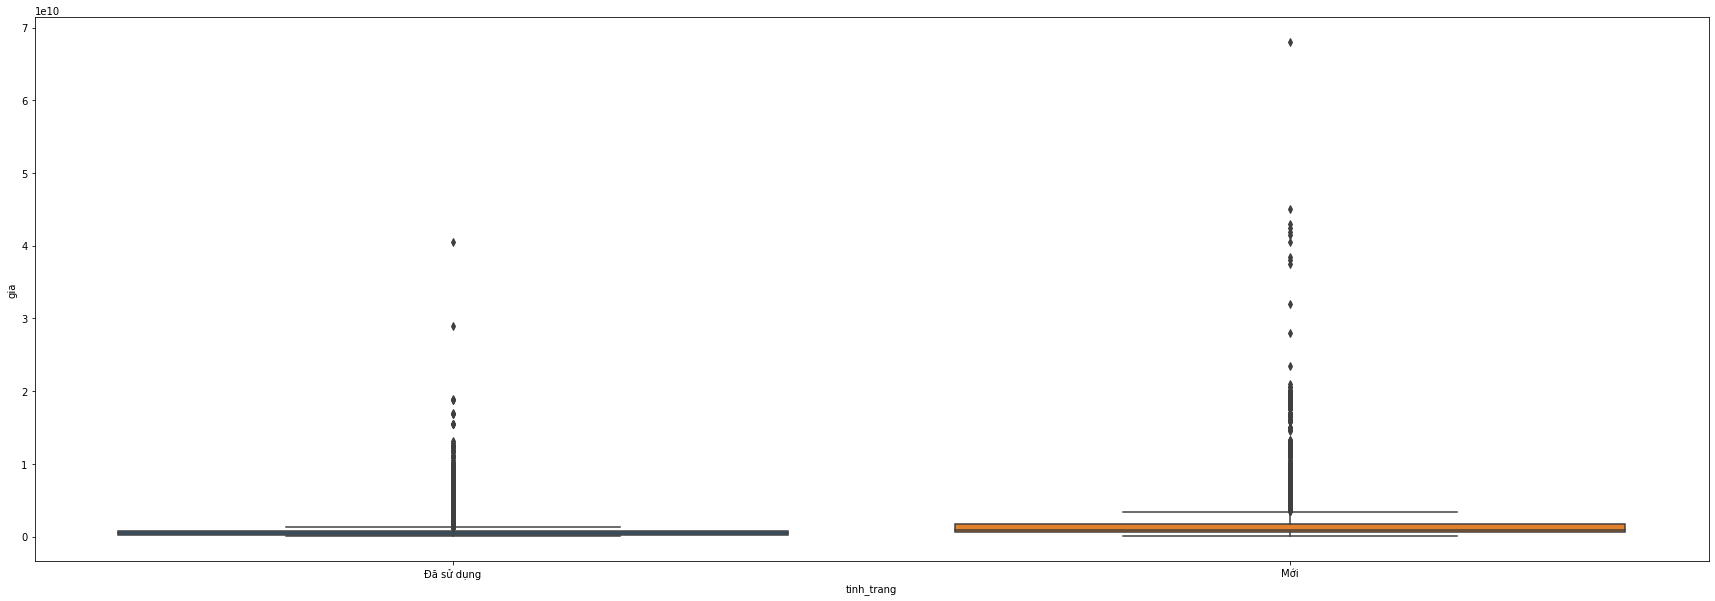

In [31]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(ax =ax, x = "tinh_trang", y = "gia", data = df)
plt.show()

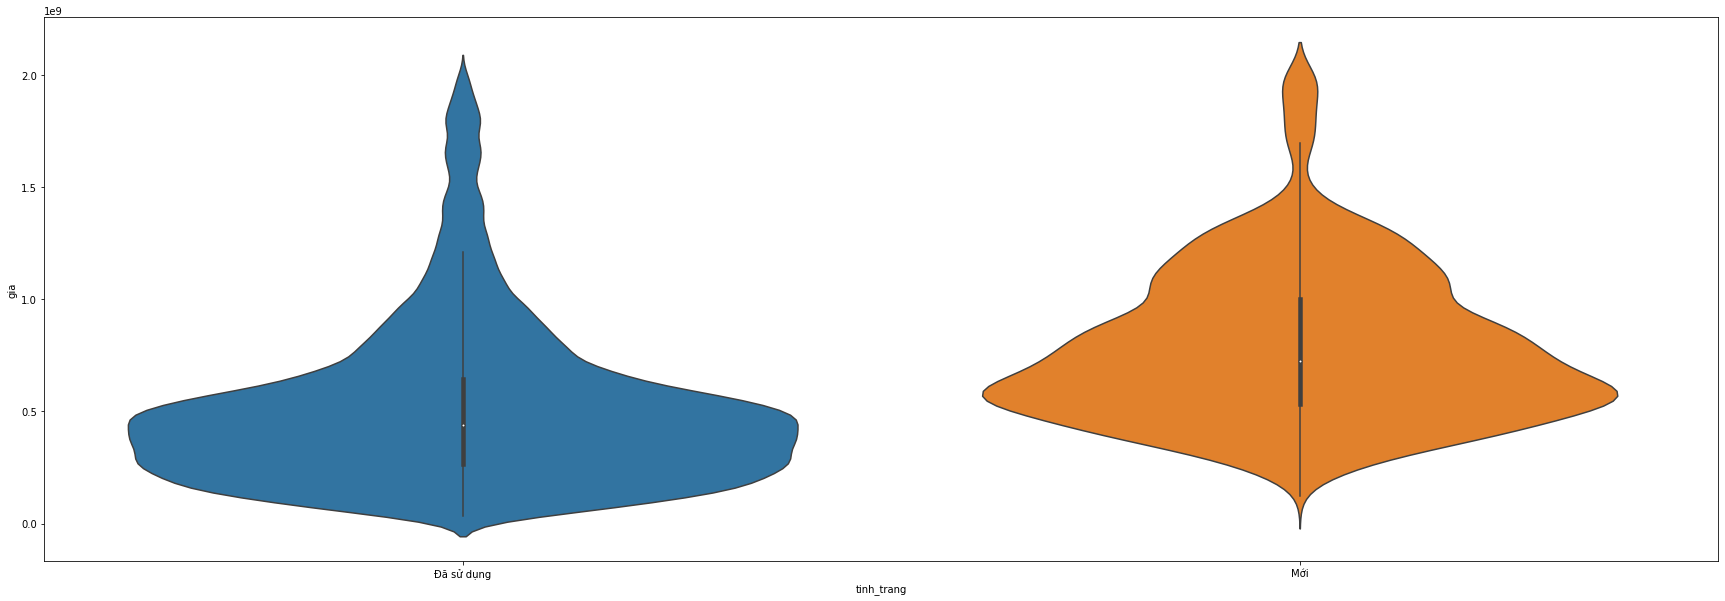

In [32]:
fig, ax = plt.subplots(figsize=(30,10))
sns.violinplot(ax =ax, x = "tinh_trang", y = "gia", data = df[df.gia < 2e9])
plt.show()

### Số km đã đi

In [33]:
df[(df.km_da_di == 0) & (df.tinh_trang == "Mới")][['nam_sx', 'km_da_di','tinh_trang']]

,nam_sx,km_da_di,tinh_trang
2,2021,0,Mới
3,2021,0,Mới
5,2021,0,Mới
11,2021,0,Mới
12,2021,0,Mới
...,...,...,...
25954,2021,0,Mới
25976,2021,0,Mới
25981,2019,0,Mới
25984,2021,0,Mới


In [34]:
# Xe mới nhưng có số km đã đi > 0???
df[(df.km_da_di < 1e6) & (df.km_da_di > 0) & (df.tinh_trang == "Mới")][['nam_sx', 'km_da_di','tinh_trang']]

# Những xe có km đã đi > 0 ====> Đã sử dụng
df.loc[df.km_da_di > 0, 'tinh_trang'] = "Đã sử dụng"

In [35]:
# Đã sử dụng nhưng km đã đi = 0???
df[(df.km_da_di == 0) & (df.tinh_trang == "Đã sử dụng")][['nam_sx', 'km_da_di','tinh_trang']]

fail = df.loc[(df.tinh_trang == "Đã sử dụng") & (df.km_da_di == 0)].nam_sx
year = []
for idx,i in enumerate(list(fail.values)):
        year.append(int(i))
# Trung bình 1 năm đi được 20000 km
tb_km_da_di = [20000*(2022-y) for y in year]
df.loc[fail.index, 'km_da_di'] = tb_km_da_di

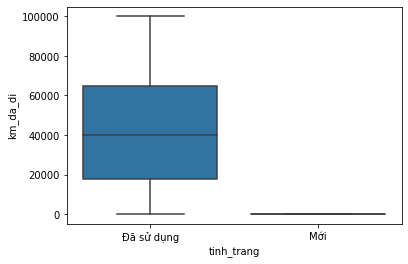

In [36]:
sns.boxplot(x = "tinh_trang", y = "km_da_di", data = df[df.km_da_di < 1e5])
plt.show()

In [37]:
#df = df[df.km_da_di < 1e9]
import plotly.express as px
fig = px.scatter(df, y="gia", x="km_da_di")
fig.update_traces(marker_size=10)
fig.show()

### Xuất xứ

Lắp ráp trong nước    24733
Nhập khẩu             16415
Name: xuat_xu, dtype: int64


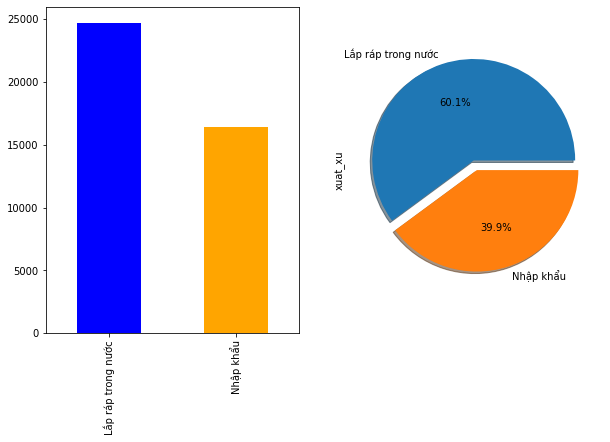

In [38]:
print(df.xuat_xu.value_counts())
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize = (10,6))
df.xuat_xu.value_counts().plot(kind = "bar", ax = ax1, color = ["blue", "orange"])
df.xuat_xu.value_counts().plot(kind = "pie", ax = ax2, shadow = True, autopct='%1.1f%%', explode = (0.1,0))
plt.show()

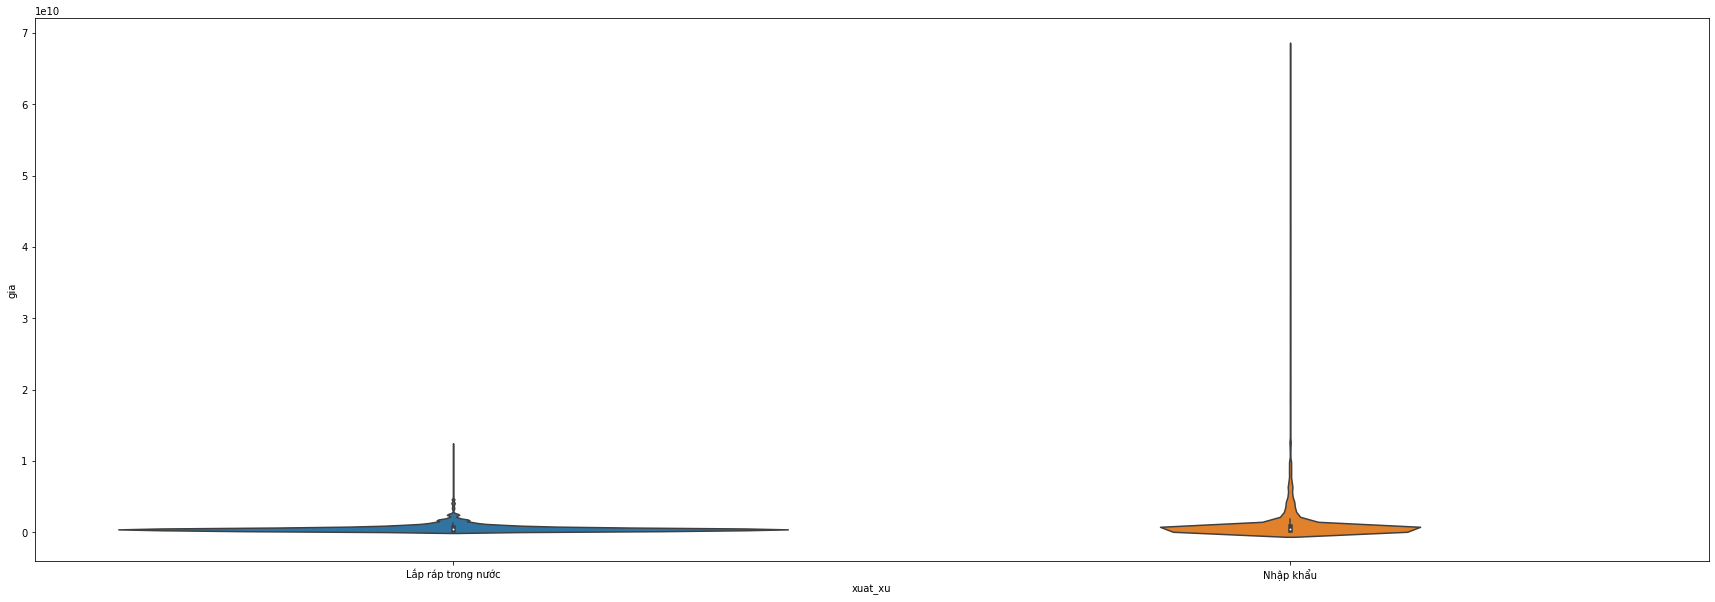

In [39]:
fig, ax = plt.subplots(figsize=(30,10))
sns.violinplot(ax =ax, x = "xuat_xu", y = "gia", data = df)
plt.show()

# Nhiên liệu

Xăng      34591
Dầu        6420
Hybrid      131
Điện          6
Name: nhien_lieu, dtype: int64


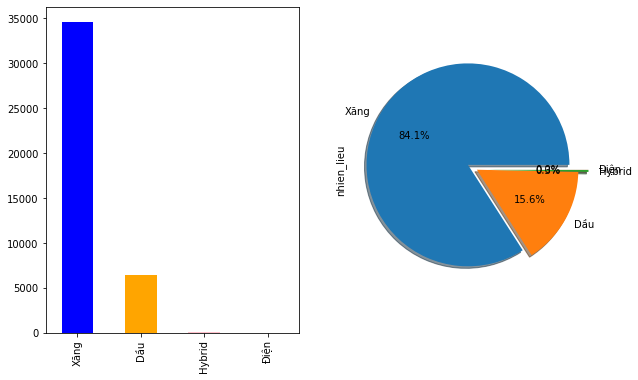

In [40]:
print(df.nhien_lieu.value_counts())
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize = (10,6))
df.nhien_lieu.value_counts().plot(kind = "bar", ax = ax1, color = ["blue", "orange",'pink','green'])
df.nhien_lieu.value_counts().plot(kind = "pie", ax = ax2, shadow = True, autopct='%1.1f%%', explode = (0.1,0,0.1,0.1))
plt.show()

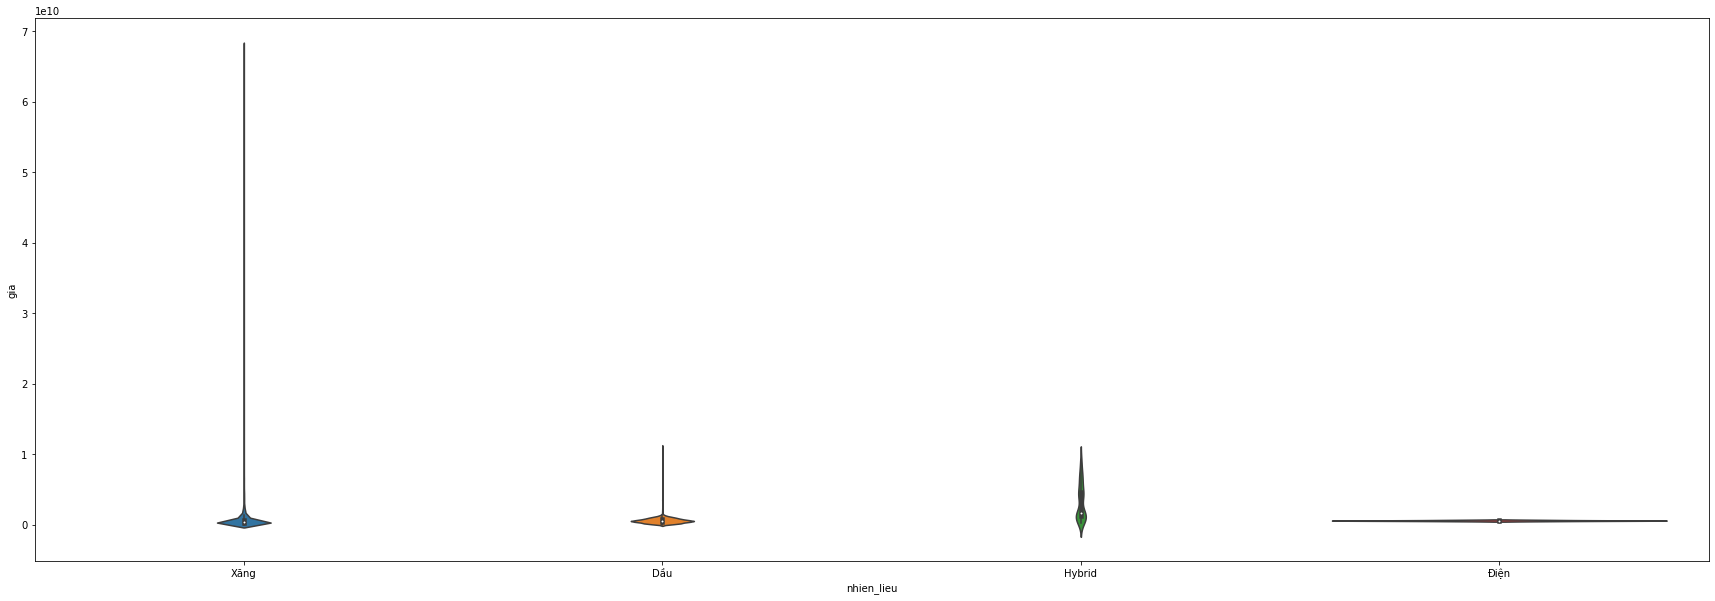

In [41]:
fig, ax = plt.subplots(figsize=(30,10))
sns.violinplot(ax =ax, x = "nhien_lieu", y = "gia", data = df)#[df.gia < 1e9])
plt.show()

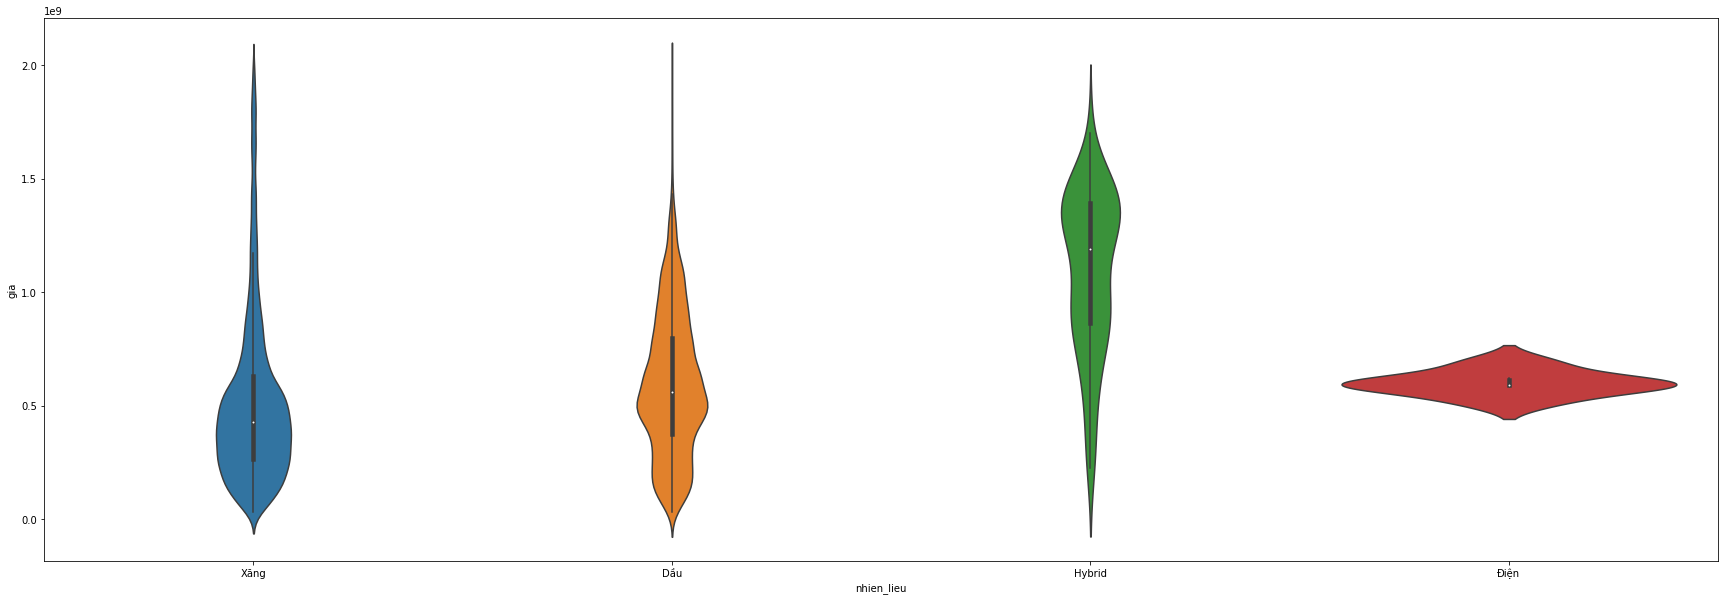

In [42]:
fig, ax = plt.subplots(figsize=(30,10))
sns.violinplot(ax =ax, x = "nhien_lieu", y = "gia", data = df[df.gia < 2e9])
plt.show()

In [43]:
min(sorted(df.gia.unique()))

32000000

# Loại bỏ "dòng khác", "hãng khác",...

In [44]:
df = df[(df.dong_xe != 'Dòng khác') & (df.dong_xe != 'Dòng khác') & (df.dong_xe != 'khác') & (df.dong_xe != 'Dongkhac')
         (df.hang != "Hãng khác") & 
         (df.kieu_dang != "Kiểu dáng khác") &
         (df.so_cho_ngoi != "Khác")]

TypeError: 'Series' object is not callable

In [45]:
df = df.astype({
    "kieu_dang" : str,
    "hop_so" : str,
    "km_da_di" : int,
    "nhien_lieu" : str,
    "so_cho_ngoi" : int,
    'tinh_trang' : str,
    "xuat_xu" : str,
    'nam_sx' : int,
    'gia' : np.double,
    'dong_xe' : str,
    'hang' : str
})

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41148 entries, 0 to 41147
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   kieu_dang    41148 non-null  object 
 1   hop_so       41148 non-null  object 
 2   km_da_di     41148 non-null  int32  
 3   nhien_lieu   41148 non-null  object 
 4   so_cho_ngoi  41148 non-null  int32  
 5   tinh_trang   41148 non-null  object 
 6   xuat_xu      41148 non-null  object 
 7   nam_sx       41148 non-null  int32  
 8   gia          41148 non-null  float64
 9   dong_xe      41148 non-null  object 
 10  hang         41148 non-null  object 
dtypes: float64(1), int32(3), object(7)
memory usage: 3.0+ MB


In [47]:
df.describe()

,km_da_di,so_cho_ngoi,nam_sx,gia
count,4.114800e+04,41148.000000,41148.000000,4.114800e+04
mean,1.471698e+05,5.719452,2014.502673,8.001651e+08
std,2.497685e+06,2.211953,5.699630,1.560205e+09
min,0.000000e+00,2.000000,1980.000000,3.200000e+07
25%,2.000000e+04,5.000000,2011.000000,2.850000e+08
50%,6.000000e+04,5.000000,2016.000000,4.750000e+08
75%,1.100000e+05,7.000000,2019.000000,7.500000e+08
max,3.000000e+08,47.000000,2021.000000,6.800000e+10


In [ ]:
df.to_csv('data.csv', sep='\t', encoding='utf-8')
df